<a href="https://colab.research.google.com/github/karanidenis/Ml_concepts/blob/main/Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
# from scipy import misc
import numpy as np
from skimage import exposure
from math import ceil
from google.colab import drive
drive.mount('/content/drive')
import imageio

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-15-6ae8072ea5af>:63: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(path, mode='RGB')


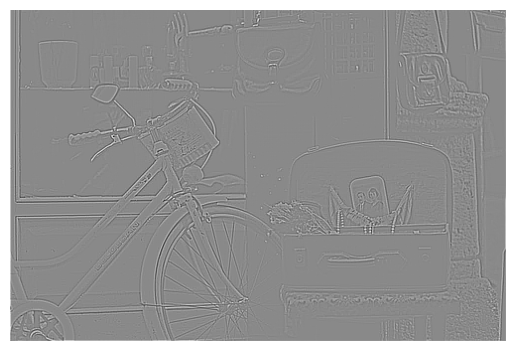

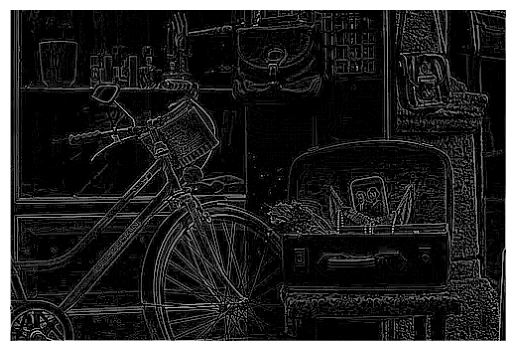

In [ ]:
def convolution2d(conv_input, conv_kernel, bias=0, strides=(1, 1), padding='same'):
    # This function which takes an input (Tensor) and a kernel (Tensor)
    # and returns the convolution of them
    # Args:
    #   conv_input: a numpy array of size [input_height, input_width, input # of channels].
    #   conv_kernel: a numpy array of size [kernel_height, kernel_width, input # of channels]
    #                represents the kernel of the Convolutional Layer's filter.
    #   bias: a scalar value, represents the bias of the Convolutional Layer's filter.
    #   strides: a tuple of (convolution vertical stride, convolution horizontal stride).
    #   padding: type of the padding scheme: 'same' or 'valid'.
    # Returns:
    #   a numpy array (convolution output).

    assert len(conv_kernel.shape) == 3, "The size of the kernel should be (kernel_height, kernel_width, input # of channels)"
    assert len(conv_input.shape) == 3, "The size of the input should be (input_height, input_width, input # of channels)"
    assert conv_kernel.shape[2] == conv_input.shape[2], "the input and the kernel should have the same depth."

    input_w, input_h = conv_input.shape[1], conv_input.shape[0]      # input_width and input_height
    kernel_w, kernel_h = conv_kernel.shape[1], conv_kernel.shape[0]  # kernel_width and kernel_height

    if padding == 'same':
        output_height = int(ceil(float(input_h) / float(strides[0])))
        output_width = int(ceil(float(input_w) / float(strides[1])))

        # Calculate the number of zeros which are needed to add as padding
        pad_along_height = max((output_height - 1) * strides[0] + kernel_h - input_h, 0)
        pad_along_width = max((output_width - 1) * strides[1] + kernel_w - input_w, 0)
        pad_top = pad_along_height // 2             # amount of zero padding on the top
        pad_bottom = pad_along_height - pad_top     # amount of zero padding on the bottom
        pad_left = pad_along_width // 2             # amount of zero padding on the left
        pad_right = pad_along_width - pad_left      # amount of zero padding on the right

        output = np.zeros((output_height, output_width))  # convolution output

        # Add zero padding to the input image
        image_padded = np.zeros((conv_input.shape[0] + pad_along_height,
                                 conv_input.shape[1] + pad_along_width, conv_input.shape[2]))
        image_padded[pad_top:-pad_bottom, pad_left:-pad_right, :] = conv_input
        # print("image_padded=", image_padded)

        for x in range(output_width):  # Loop over every pixel of the output
            for y in range(output_height):
                # element-wise multiplication of the kernel and the image
                output[y, x] = (conv_kernel * image_padded[y * strides[0]:y * strides[0] + kernel_h,
                                x * strides[1]:x * strides[1] + kernel_w, :]).sum() + bias

    elif padding == 'valid':
        output_height = int(ceil(float(input_h - kernel_h + 1) / float(strides[0])))
        output_width = int(ceil(float(input_w - kernel_w + 1) / float(strides[1])))

        output = np.zeros((output_height, output_width))  # convolution output

        for x in range(output_width):  # Loop over every pixel of the output
            for y in range(output_height):
                # element-wise multiplication of the kernel and the image
                output[y, x] = (conv_kernel * conv_input[y * strides[0]:y * strides[0] + kernel_h,
                                x * strides[1]:x * strides[1] + kernel_w, :]).sum() + bias

    return output

# load the image as RGB (3 channels)
path = '/content/drive/MyDrive/Colab-Notebooks/Images/image2.png'
img = imageio.imread(path, mode='RGB')

# The edge detection kernel
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])[..., None]
kernel = np.repeat(kernel, 3, axis=2)

# Convolve image and kernel
image_edges= convolution2d(img, kernel)

# Plot the filtered image
plt.imshow(image_edges, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

# Adjust the contrast of the filtered image by applying Histogram Equalization
image_edges_equalized = exposure.equalize_adapthist(image_edges / np.max(np.abs(image_edges)),
                                                      clip_limit=0.04)
plt.imshow(image_edges_equalized, cmap=plt.cm.gray)
plt.axis('off')
plt.show()


# Intranet Convolution and pooling

# 0. Valid Convolution

In [ ]:
def convolve_grayscale_valid(images, kernel):
    m, h, w = images.shape
    kh, kw = kernel.shape

    # Calculate the output size for "valid" convolution
    out_h = h - kh + 1
    out_w = w - kw + 1

    # Initialize the output array
    convolved_images = np.zeros((m, out_h, out_w))

    # Perform "valid" convolution with two for loops
    for i in range(out_h):
        for j in range(out_w):
            # Extract a patch from the image
            patch = images[:, i:i + kh, j:j + kw]

            # Perform the convolution by element-wise multiplication and sum
            convolved_images[:, i, j] = np.sum(patch * kernel, axis=(1, 2))
            # print(convolved_images)

    return convolved_images

In [ ]:
# Define the path to the MNIST dataset file
train_images_path = '/content/drive/MyDrive/Colab-Notebooks/Images/train-images-idx3-ubyte'

# Load training images
with open(train_images_path, 'rb') as f:
    # Skip the header (first 16 bytes) and reshape the data
    train_images = np.fromfile(f, dtype=np.uint8, offset=16).reshape(-1, 28, 28)
    # Select the first 10 images from the original dataset for testing
    small_dataset = train_images[:1]


(1, 28, 28)
(1, 26, 26)


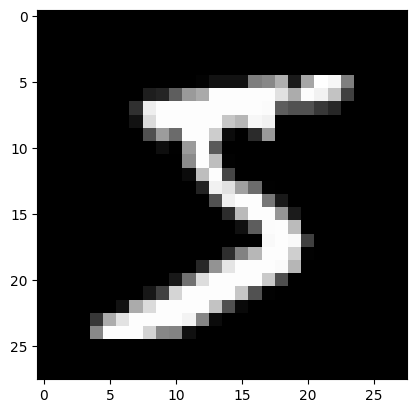

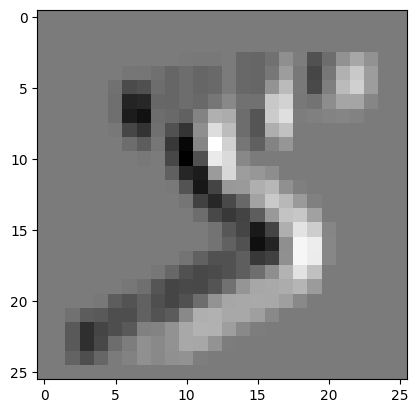

In [ ]:
# convolve_grayscale_valid = __import__('0-convolve_grayscale_valid').convolve_grayscale_valid


# if __name__ == '__main__':

images = small_dataset
print(images.shape)
kernel = np.array([[1 ,0, -1], [1, 0, -1], [1, 0, -1]])
images_conv = convolve_grayscale_valid(images, kernel)
print(images_conv.shape)


plt.imshow(images[0], cmap='gray')
plt.show()
plt.imshow(images_conv[0], cmap='gray')
plt.show()

# [1] Same Convolution

In [ ]:
# Write a function def convolve_grayscale_padding(images, kernel, padding): that performs a convolution on grayscale images with custom padding:

# images is a numpy.ndarray with shape (m, h, w) containing multiple grayscale images
# m is the number of images
# h is the height in pixels of the images
# w is the width in pixels of the images
# kernel is a numpy.ndarray with shape (kh, kw) containing the kernel for the convolution
# kh is the height of the kernel
# kw is the width of the kernel
# padding is a tuple of (ph, pw)
# ph is the padding for the height of the image
# pw is the padding for the width of the image
# the image should be padded with 0’s
# You are only allowed to use two for loops; any other loops of any kind are not allowed
# Returns: a numpy.ndarray containing the convolved images


def convolve_grayscale_same(images, kernel):
    """
    perfom a concolution of a grayscale image
    """
    m, h, w = images.shape
    kh, kw = kernel.shape
    m, h, w = images.shape
    kh, kw = kernel.shape
    # Calculate the padding required to maintain the same output size
    padding_h = kh // 2
    padding_w = kw // 2
    padded_images = np.pad(
        images, ((0, 0), (padding_h, padding_h), (padding_w, padding_w)),
        mode='constant')

    # Perform convolution
    convolved_images = np.zeros((m, h, w))
    for i in range(m):
        for j in range(h):
            for k in range(w):
                patch = padded_images[i, j:j + kh, k:k + kw]
                convolved_images[i, j, k] = np.sum(patch * kernel)
                # print(convolved_images)

    return convolved_images


In [ ]:
# convolve_grayscale_valid = __import__('0-convolve_grayscale_valid').convolve_grayscale_valid


# if __name__ == '__main__':

images = small_dataset
print(images.shape)
kernel = np.array([[1 ,0, -1], [1, 0, -1], [1, 0, -1]])
images_conv = convolve_grayscale_same(images, kernel)
print(images_conv.shape)

plt.imshow(images[0], cmap='gray')
plt.show()
plt.imshow(images_conv[0], cmap='gray')
plt.show()


# 2. Convolution with Padding

In [ ]:
def convolve_grayscale_padding(images, kernel, padding):
  m, h, w = images.shape
  kh, kw = kernel.shape

  # ph = h - kh  # padding_height
  # pw = w - kw  # padding_width
  # pad = (ph, pw)
  ph, pw = padding
  # Calculate the output size with padding
  out_h = h + 2 * ph - kh + 1
  out_w = w + 2 * pw - kw + 1

  padded_images = np.pad(images, ((0, 0), (ph, ph), (pw, pw)), mode='constant')

  # # output size
  # s_h = (h - kh) / (out_h - 1)
  # s_w = (w - kw) / (out_w - 1)
  # out_h = (h + 2 *ph - kh) / s_h + 1
  # out_w = (w + 2* pw - kw) / s_w + 1
  # initialize convolved image
  convolved_images = np.zeros((m, out_h, out_w))

  for i in range(m):
    for j in range(out_h):
        for k in range(out_w):
            # Extract a patch from the image
            patch = padded_images[i, j:j + kh, k:k + kw]
            convolved_images[i, j, k] = np.sum(patch * kernel)

  return convolved_images

In [ ]:
images = small_dataset
print(images.shape)
kernel = np.array([[1 ,0, -1], [1, 0, -1], [1, 0, -1]])
images_conv = convolve_grayscale_padding(images, kernel, (2, 4))
print(images_conv.shape)

plt.imshow(images[0], cmap='gray')
plt.show()
plt.imshow(images_conv[0], cmap='gray')
plt.show()

# 3. Strided Convolution

In [ ]:
def convolve_grayscale(images, kernel, padding='same', stride=(1, 1)):
  m, h, w = images.shape
  kh, kw = kernel.shape

  if padding == 'same':
      ph = max(0, (h - 1) * stride[0] + kh - h)
      pw = max(0, (w - 1) * stride[1] + kw - w)
  elif isinstance(padding, tuple):
      ph, pw = padding
  else:
      ph, pw = 0, 0

  # stride
  sh, sw = stride
  # Calculate the output size with padding
  # out_h = h + 2 * ph - kh + 1
  # out_w = w + 2 * pw - kw + 1
  out_h = (h + 2 *ph - kh) // sh + 1
  out_w = (w + 2* pw - kw) // sw + 1

  padded_images = np.pad(images, ((0, 0), (ph, ph), (pw, pw)), mode='constant')

  # initialise convolved images
  convolved_images = np.zeros((m, out_h, out_w))

  for i in range(m):
    for j in range(out_h):
        for k in range(out_w):
            # Extract a patch from the image
            patch = padded_images[i, j * sh:j * sh + kh, k * sw:k * sw + kw]
            convolved_images[i, j, k] = np.sum(patch * kernel)

  return convolved_images


In [ ]:
images = small_dataset
print(images.shape)
kernel = np.array([[1 ,0, -1], [1, 0, -1], [1, 0, -1]])
images_conv = convolve_grayscale(images, kernel, padding='valid', stride=(2, 2))
print(images_conv.shape)

plt.imshow(images[0], cmap='gray')
plt.show()
plt.imshow(images_conv[0], cmap='gray')
plt.show()

# 4. Convolution with Channels

In [ ]:
def convolve_channels(images, kernel, padding='same', stride=(1, 1)):
  m, h, w, c = images.shape
  kh, kw, kc = kernel.shape
  # stride
  sh, sw = stride

  if padding == 'same':
    ph = int(((h - 1) * sh + kh - h) / 2)
    pw = int(((w - 1) * sw + kw - w) / 2)
  elif isinstance(padding, tuple):
    ph, pw = padding
  elif padding == 'valid':
    ph, pw = 0,0

  #output
  out_h = int((h - kh + 2 * ph) / sh) + 1
  out_w = int((w - kw + 2 * pw) / sw) + 1

  # Pad the input images
  images_padded = np.pad(images, ((0, 0), (ph, ph), (pw, pw), (0, 0)), mode='constant')

  # initialise convolved images
  convolved_images = np.zeros((m, out_h, out_w ))

  # Perform the convolution
  for i in range(out_h):
      for j in range(out_w):
                # Extract a patch from the image
                patch = images_padded[:, i * sh:i * sh + kh, j * sw:j * sw + kw, :]
                convolved_images[:, i, j] = np.tensordot(patch, kernel, axes=([1, 2, 3], [0, 1, 2]))

  return convolved_images

In [ ]:
train_images_path = '/content/drive/MyDrive/Colab-Notebooks/Images/data.npy'
# Load the dataset from the specified path
train_dataset = np.load(train_images_path)
# print(train_dataset[:1])
print(train_dataset.shape)

In [ ]:
images = train_dataset[:10]
print(images.shape)
kernel = np.array([[[0, 0, 0], [-1, -1, -1], [0, 0, 0]], [[-1, -1, -1], [5, 5, 5], [-1, -1, -1]], [[0, 0, 0], [-1, -1, -1], [0, 0, 0]]])
print(kernel.shape)
images_conv = convolve_channels(images, kernel, padding='valid')
print(images_conv.shape)

plt.imshow(images[0])
plt.show()
plt.imshow(images_conv[0])
plt.show()

# 5. Multiple Kernels

In [ ]:
# c - no. of channels in the image
# nc - no. of kernels/filters

def convolve(images, kernels, padding='same', stride=(1, 1)):
    m, h, w, c = images.shape
    kh, kw, _, nc = kernels.shape
    # stride
    sh, sw = stride

    if padding == 'same':
      ph = max(0, (h - 1) * stride[0] + kh - h)
      pw = max(0, (h-1) * stride[1] + kw -w)
    elif padding == 'valid':
      ph, pw = 0,0
    elif isinstance(padding, tuple):
      ph , pw = padding

    # Calculate the output dimensions
    oh = int((h - kh + 2 * ph) / sh) + 1
    ow = int((w - kw + 2 * pw) / sw) + 1

    # Pad the input images
    images_padded = np.pad(images, ((0, 0), (ph, ph), (pw, pw), (0, 0)), mode='constant')

    # Initialize the output tensor
    convolved_images = np.zeros((m, oh, ow, nc))

    # Perform the convolution
    for i in range(oh):
        for j in range(ow):
            for k in range(nc):
                # Extract a patch from the image
                patch = images_padded[:, i * sh:i * sh + kh, j * sw:j * sw + kw, :]
                # Convolve using tensordot to handle multiple channels
                convolved_images[:, i, j, k] = np.tensordot(patch, kernels[:, :, :, k], axes=([1, 2, 3], [0, 1, 2]))

    return convolved_images


(10, 32, 32, 3)
(10, 30, 30, 3)


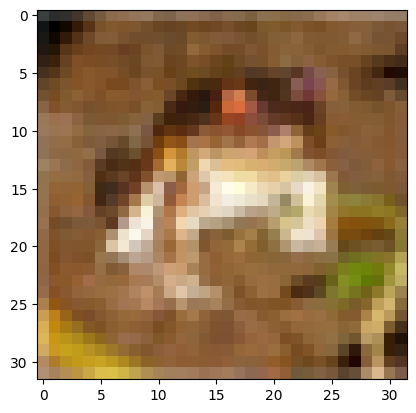

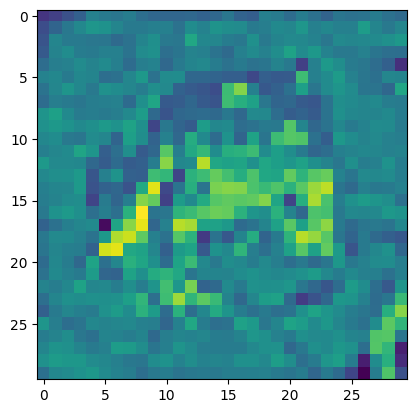

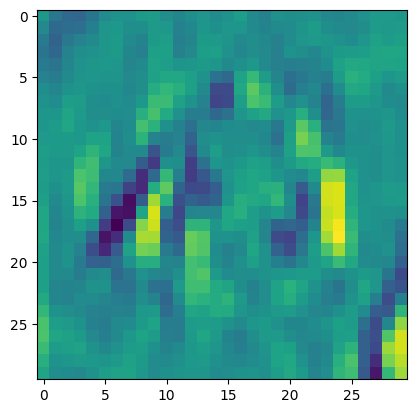

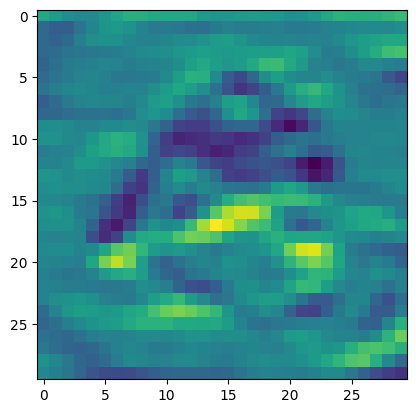

In [ ]:
images = train_dataset[:10]
print(images.shape)
kernels = np.array([[[[0, 1, 1], [0, 1, 1], [0, 1, 1]], [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], [[0, -1, 1], [0, -1, 1], [0, -1, 1]]],
                    [[[-1, 1, 0], [-1, 1, 0], [-1, 1, 0]], [[5, 0, 0], [5, 0, 0], [5, 0, 0]], [[-1, -1, 0], [-1, -1, 0], [-1, -1, 0]]],
                    [[[0, 1, -1], [0, 1, -1], [0, 1, -1]], [[-1, 0, -1], [-1, 0, -1], [-1, 0, -1]], [[0, -1, -1], [0, -1, -1], [0, -1, -1]]]])

images_conv = convolve(images, kernels, padding='valid')
print(images_conv.shape)

plt.imshow(images[0])
plt.show()
plt.imshow(images_conv[0, :, :, 0])
plt.show()
plt.imshow(images_conv[0, :, :, 1])
plt.show()
plt.imshow(images_conv[0, :, :, 2])
plt.show()

# 6. Pooling

In [ ]:
def pool(images, kernel_shape, stride, mode='max'):
    m, h, w, c = images.shape
    kh, kw = kernel_shape
    sh, sw = stride

    # Calculate the output dimensions
    oh = int((h - kh) / sh) + 1
    ow = int((w - kw) / sw) + 1

    # Initialize the output tensor
    pooled_images = np.zeros((m, oh, ow, c))

    for i in range(oh):
        for j in range(ow):
            # Extract a patch from the image
            patch = images[:, i * sh:i * sh + kh, j * sw:j * sw + kw, :]

            # Apply pooling based on the specified mode
            if mode == 'max':
                pooled_patch = np.max(patch, axis=(1, 2))
            elif mode == 'avg':
                pooled_patch = np.mean(patch, axis=(1, 2))
            else:
                raise ValueError("Invalid pooling mode. Use 'max' or 'avg'.")

            # Store the pooled patch in the output
            pooled_images[:, i, j, :] = pooled_patch

    return pooled_images

(10, 32, 32, 3)
(10, 16, 16, 3)


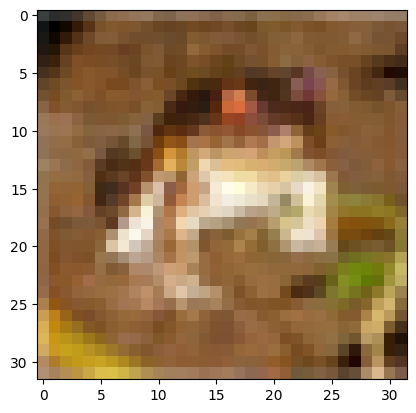

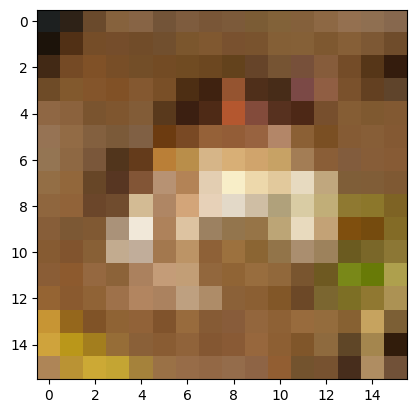

In [ ]:
images = train_dataset[:10]
print(images.shape)
images_pool = pool(images, (2, 2), (2, 2), mode='avg')
print(images_pool.shape)

plt.imshow(images[0])
plt.show()
plt.imshow(images_pool[0] / 255)
plt.show()